# Задание 1 - Классификация

* Необходимо предсказать клас y на фичах a, b, c.

* Задание 1. Построить модель Pymc с множественной логистической регрессией для решения задачи. Предсказать класс на test_clf.

* Задание 2. Построить модель Pymc с порождающим множественным логистическим классификатором для решения задачи. Предсказать класс на test_clf.

* Каждое задание оценивается в 10 баллов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import scipy.stats as stats
import pymc as pm
import arviz as az

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

sns.set_style("whitegrid")

In [2]:
df_clf = pd.read_csv('classify/train_clf.csv')

In [3]:
df_clf.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       100 non-null    float64
 1   b       100 non-null    float64
 2   c       100 non-null    float64
 3   y       100 non-null    float64
dtypes: float64(4)
memory usage: 3.3 KB


/Users/imachome/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/imachome/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/imachome/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/imachome/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

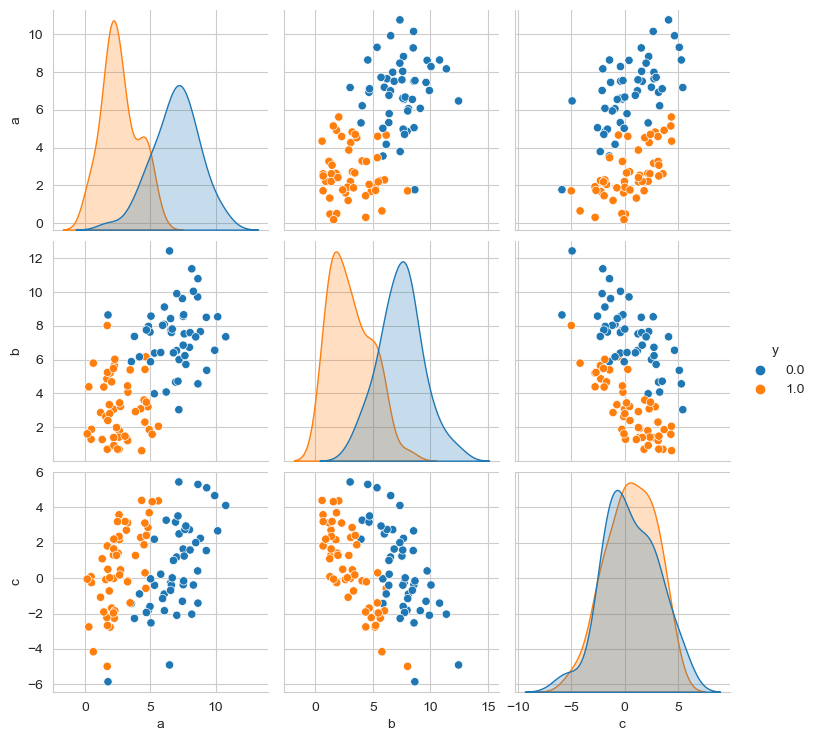

In [4]:
sns.pairplot(df_clf, hue='y', diag_kind='kde');


In [5]:
columns = ['a', 'b', 'c']
X_train, X_test, y_train, y_test = train_test_split( df_clf[columns], df_clf['y'], 
                                                    train_size=0.8, 
                                                    random_state=42)

In [6]:
X_train.shape

(80, 3)

In [7]:
X_test.shape

(20, 3)

In [9]:
y_1 = pd.Categorical(y_train).codes
st_scaler = preprocessing.StandardScaler()
X_train_transform = st_scaler.fit_transform(X_train)
X_test_transform = st_scaler.transform(X_test)

### Задание 1.1. Построить модель Pymc с множественной логистической регрессией для решения задачи. Предсказать класс на test_clf.

In [10]:
with pm.Model() as model_3: 
    α = pm.Normal('α', mu=0, sigma=10) 
    β = pm.StudentT('β', mu=0, sigma=2, nu=70, shape=len(columns)) 
    μ = α + pm.math.dot(X_train_transform,β) 
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ)) 
    
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * X_train_transform[:,0])
    
    yl = pm.Bernoulli('yl', p=θ, observed=y_1) 
 
    trace_3 = pm.sample(3000, chains = 4, cores = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 18 seconds.


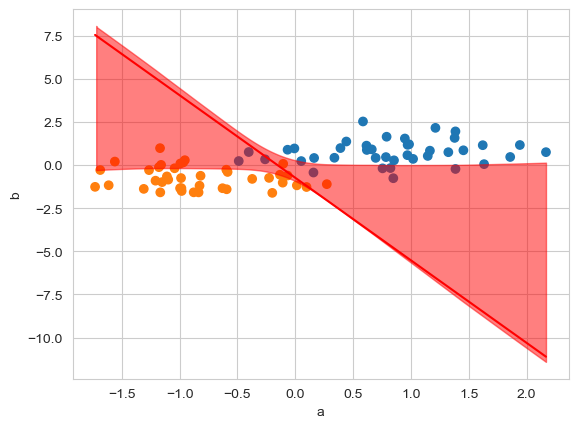

In [11]:
idx = np.argsort(X_train_transform[:,0]) 
bd = trace_3.posterior['bd'].mean(("chain", "draw"))[idx]

plt.scatter(X_train_transform[:,0], X_train_transform[:,1], c=[f'C{i}' for i in y_1]) 

plt.plot(X_train_transform[:,0][idx], bd, color='r'); 
az.plot_hdi(X_train_transform[:,0], trace_3.posterior['bd'], color='r')
 
plt.xlabel(columns[0]);
plt.ylabel(columns[1]);

In [12]:
α = trace_3.posterior['α'].mean(("chain", "draw")).values
β = trace_3.posterior["β"].mean(("chain", "draw")).values

μ = α + np.dot(X_test_transform, β)

predict = 1 / (1 + np.exp(-μ))

threshold = 0.5
y_pred = [1 if i > threshold else 0 for i in predict]
y_pred

[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0]

In [13]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

Предсказание на тестовом файле для задания 1.1

In [15]:
df_test = pd.read_csv('classify/test_clf.csv')
X_transform_test = st_scaler.transform(df_test)

μ = α + np.dot(X_transform_test, β)

predict = 1 / (1 + np.exp(-μ))

threshold = 0.5
y_predict = [1 if i > threshold else 0 for i in predict]
y_predict

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1]

In [16]:
from sklearn.metrics import accuracy_score
y_true = pd.read_csv('test_Y_true_clf.csv')
accuracy_score(y_true, y_predict)

0.97

### Задание 1.2. Построить модель Pymc с порождающим множественным логистическим классификатором для решения задачи. Предсказать класс на test_clf.

In [17]:
with pm.Model() as lda:
    μ = pm.Normal('μ', mu=0, sigma=20, shape=2)
    σ = pm.HalfNormal('σ', 10, shape=2)
    setosa = pm.Normal('a', mu=μ[0], sigma=σ[0], observed=X_train_transform) 
    versicolor = pm.Normal('b', mu=μ[1], sigma=σ[1], observed=X_train_transform) 
    
    bd = pm.Deterministic('bd', (μ[0] + μ[1]) / 2)
    trace_lda = pm.sample(2000, chains = 4, cores = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 15 seconds.


Text(0, 0.5, 'θ')

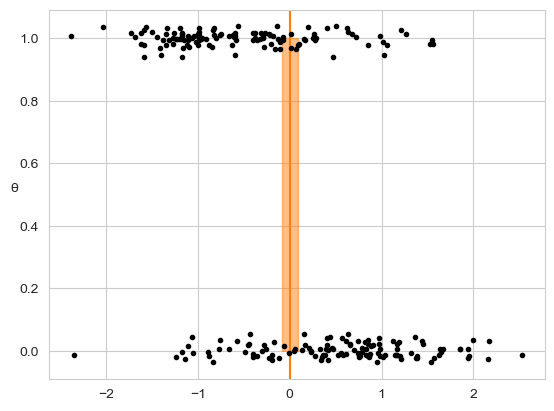

In [18]:
posterior_lda = trace_lda.posterior.stack(samples=("chain", "draw"))

plt.axvline(posterior_lda['bd'].mean(), ymax=1, color='C1')
bd_hpd = az.hdi(posterior_lda['bd'].values)

plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='C1', alpha=0.5)

plt.plot(X_train_transform, np.random.normal(y_train, 0.02), '.', color='k')
plt.ylabel('θ', rotation=0)


In [19]:
posterior_lda = trace_lda.posterior.stack(samples=("chain", "draw"))
y_pred = [1 if i < posterior_lda['bd'].mean() else 0 for i in X_test_transform.sum(axis=1)]
y_pred

[1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]

In [20]:
accuracy_score(y_test, y_pred)

0.8

In [22]:
df_test = pd.read_csv('classify/test_clf.csv')
X_transform_test = st_scaler.transform(df_test)
y_predict = [1 if i < posterior_lda['bd'].mean() else 0 for i in X_transform_test.sum(axis=1)]
y_predict

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1]

In [24]:
from sklearn.metrics import accuracy_score
y_true = pd.read_csv('test_Y_true_clf.csv')
accuracy_score(y_true, y_predict)

0.88

# Задание 2 - Регрессия

* Задание 1. Востановить параметры линейной регрессии (ее вид и веса) с использованием Pymc

* Задание 2. Найти для тестовых X значения y предсказанного для вашей отобраной регрессии.

#### Задание 2.1. Востановить параметры линейной регрессии (ее вид и веса) с использованием Pymc

In [27]:
df_reg = pd.read_csv('regression/train_reg.csv')
df_reg.head(5)

,x,y
0,0.415709,2.267527
1,2.078132,5.761260
2,6.152402,17.237352
3,7.064143,18.693992
4,8.140977,23.252819


In [28]:
X_train, X_test, y_train, y_test = train_test_split( df_reg['x'], df_reg['y'], 
                                                    train_size=0.8, 
                                                    random_state=42)

In [29]:
with pm.Model() as model_gc:
    α = pm.Normal('α', mu=0, sigma=10) 
    β = pm.Normal('β', mu=0, sigma=1) 
    ε = pm.HalfCauchy('ε', 10)
    
    y_pred = pm.Normal('ypred', mu= α + β * X_train, sigma=ε, observed=y_train)
    
    trace_gc = pm.sample(tune=2000, draws = 1000, chains=4, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β, ε]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 16 seconds.


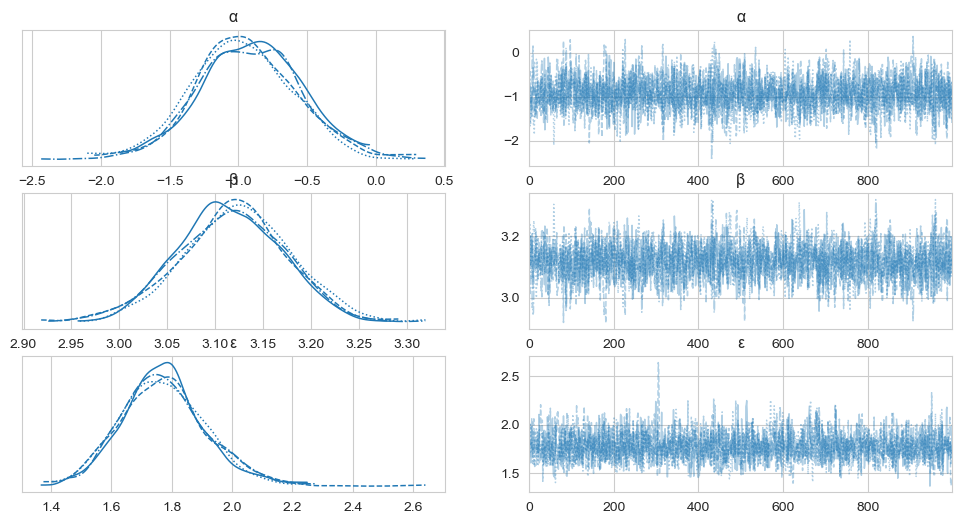

In [30]:
az.plot_trace(trace_gc, var_names=['α', 'β', 'ε']);

In [31]:
summary_df = az.summary(trace_gc).head(3)
summary_df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,-0.935,0.372,-1.659,-0.253,0.008,0.006,2062.0,1938.0,1.0
β,3.118,0.057,3.013,3.224,0.001,0.001,1976.0,1859.0,1.0
ε,1.775,0.142,1.519,2.047,0.003,0.002,2178.0,1841.0,1.0


In [32]:
α = summary_df.iloc[:1].mean()[0].item()
β = summary_df.iloc[1:2].mean()[0].item()


y_pred = α + β * X_test

y_pred

/var/folders/yr/lbn9q2ts2kv3nbc69_l3nscm0000gn/T/ipykernel_56357/146361789.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  α = summary_df.iloc[:1].mean()[0].item()
/var/folders/yr/lbn9q2ts2kv3nbc69_l3nscm0000gn/T/ipykernel_56357/146361789.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  β = summary_df.iloc[1:2].mean()[0].item()


83    17.628933
53     1.155914
70    11.551585
45    -0.937613
44    22.757005
39    21.071074
22    27.759843
80    -0.772020
10    25.031211
0      0.361181
18    28.931131
30    26.477565
73     6.118720
33    22.414282
90    22.611969
4     24.448566
76    19.573405
77    -0.120492
12    32.678467
31     5.359337
Name: x, dtype: float64

In [33]:
mean_squared_error(y_test, y_pred)

1.8411819564775258

#### Задание 2.2.  Найти для тестовых X значения y предсказанного для вашей отобраной регрессии.

In [35]:
X_test = pd.read_csv('regression/test_reg.csv')
y_predict = α + β * X_test

y_predict

,x
0,17.504035
1,7.352597
2,-3.012333
3,29.906037
4,21.590128
...,...
95,27.730642
96,32.071432
97,4.816782
98,0.742192


In [37]:
from sklearn.metrics import mean_squared_error
y_true = pd.read_csv('test_Y_true_reg.csv')
mean_squared_error(y_true, y_predict)

2.3363994256875347